In [1]:
# Import libraries
import numpy as np
import pandas as pd
import re
#import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from scipy.stats import linregress

# dictionary: block and street to lat/long
latLong = {
  '212 Marsiling Cres': [1.44622, 103.77311],
  '1 Marsiling Dr': [1.44067, 103.77571],
  '2 Marsiling Dr': [1.43995, 103.77655],
  '6 Marsiling Dr': [1.44208, 103.77633],
  '22 Marsiling Dr': [1.44191, 103.77436],
  '23 Marsiling Dr': [1.44151, 103.77330],
  '24 Marsiling Dr': [1.44154, 103.77210],
  '30 Marsiling Dr': [1.44258, 103.77240],
  '31 Marsiling Dr': [1.44305, 103.77232],
  '32 Marsiling Dr': [1.44337, 103.77293],
  '202 Marsiling Dr': [1.44289, 103.77487],
  '204 Marsiling Dr': [1.44408, 103.77370],
  '206 Marsiling Dr': [1.44537, 103.77293],
  '12 Marsiling Lane': [1.44061, 103.77870],
  '12A Marsiling Lane': [1.44141, 103.77849],
  '13 Marsiling Lane': [1.44109, 103.77925],
  '15 Marsiling Lane': [1.44198, 103.77847],
  '17 Marsiling Lane': [1.44273, 103.77804],
  '18 Marsiling Lane': [1.44342, 103.77787],
  '19 Marsiling Lane': [1.44328, 103.77730],
  '180A Marsiling Rd': [1.43913, 103.77814],
  '180B Marsiling Rd': [1.43913, 103.77835],
  '125 Marsiling Rise': [1.43849, 103.77953],
  '129 Marsiling Rise': [1.43783, 103.77871],
  '130 Marsiling Rise': [1.43812, 103.77870],
  '131 Marsiling Rise': [1.43849, 103.77862],
  '132 Marsiling Rise': [1.43829, 103.77803],
  '570A Woodlands Ave 1': [1.43071, 103.79105],
  '570B Woodlands Ave 1': [1.43091, 103.79077],
  '571C Woodlands Ave 1': [1.43040, 103.78997],
  '693A Woodlands Ave 6': [1.43864, 103.80377],
  '693B Woodlands Ave 6': [1.43834, 103.80388],
  '693C Woodlands Ave 6': [1.43793, 103.80407],
  '780A Woodlands Cres': [1.44882, 103.80067],
  '780B Woodlands Cres': [1.44902, 103.80102],
  '780C Woodlands Cres': [1.44913, 103.80139],
  '780F Woodlands Cres': [1.44788, 103.80124],
  '782C Woodlands Cres': [1.44780, 103.80344],
  '782D Woodlands Cres': [1.44823, 103.80283],
  '573A Woodlands Dr 16': [1.43133, 103.79828],
  '573B Woodlands Dr 16': [1.43094, 103.79781],
  '573C Woodlands Dr 16': [1.43052, 103.79767],
  '574A Woodlands Dr 16': [1.43011, 103.79710],
  '574B Woodlands Dr 16': [1.42970, 103.79685],
  '886A Woodlands Dr 50': [1.43830, 103.79489],
  '886B Woodlands Dr 50': [1.43824, 103.79387],
  '886D Woodlands Dr 50': [1.43794, 103.79490],
  '887B Woodlands Dr 50': [1.43710, 103.79406],
  '887C Woodlands Dr 50': [1.43697, 103.79468],
  '694A Woodlands Dr 62': [1.43916, 103.80419],
  '694B Woodlands Dr 62': [1.43926, 103.80517],
  '694C Woodlands Dr 62': [1.43862, 103.80561],
  '694D Woodlands Dr 62': [1.43843, 103.80544],
  '717A Woodlands Dr 70': [1.44049, 103.79836],
  '717B Woodlands Dr 70': [1.44135, 103.79861],
  '784B Woodlands Rise': [1.44565, 103.80499],
  '784C Woodlands Rise': [1.44602, 103.80500],
  '785B Woodlands Rise': [1.44636, 103.80527],
  '101 Woodlands St 13': [1.43612, 103.78206],
  '102 Woodlands St 13': [1.43611, 103.78117],
  '111 Woodlands St 13': [1.43784, 103.78219],
  '145 Woodlands St 13': [1.43612, 103.77324],
  '146 Woodlands St 13': [1.43612, 103.77409],
  '148 Woodlands St 13': [1.43578, 103.77402],
  '149 Woodlands St 13': [1.43578, 103.77303],
  '151 Woodlands St 13': [1.43546, 103.77423],
  '152 Woodlands St 13': [1.43505, 103.77424],
  '155 Woodlands St 13': [1.43477, 103.77459],
  '157 Woodlands St 13': [1.43437, 103.77480],
  '158 Woodlands St 13': [1.43407, 103.77478],
  '159 Woodlands St 13': [1.43371, 103.77459],
  '160 Woodlands St 13': [1.43337, 103.77469],
  '161 Woodlands St 13': [1.43337, 103.77367],
  '166 Woodlands St 13': [1.43374, 103.77543],
  '302A Woodlands St 31': [1.43185, 103.77527],
  '310 Woodlands St 31': [1.43009, 103.77598],
  '311 Woodlands St 31': [1.43185, 103.77527],
  '313 Woodlands St 31': [1.43049, 103.77617],
  '314 Woodlands St 31': [1.43119, 103.77607],
  '316 Woodlands St 31': [1.43149, 103.77637],
  '317 Woodlands St 31': [1.43190, 103.77627],
  '318 Woodlands St 31': [1.43185, 103.77731],
  '319 Woodlands St 31': [1.43150, 103.77740],
  '411 Woodlands St 41': [1.42852, 103.77282],
  '419 Woodlands St 41': [1.42852, 103.77457],
  '818 Woodlands St 82': [1.44167, 103.79018],
  '820 Woodlands St 82': [1.44101, 103.79014],
  '848 Woodlands St 82': [1.44181, 103.79198],
  '849 Woodlands St 82': [1.44147, 103.79199],
  '834 Woodlands St 83': [1.44009, 103.79108],
}

# clean up data: area, date, floor, price
def load_csv():
  return pd.read_csv('./data/2305_3rm_woodlands.csv')
def price_cleanup(df):
  df['price'] = df.price.apply(lambda x:float(x.replace('$','').replace(',','')) if isinstance(x,str) else x)
  return df
def area_cleanup(df):
  df['area'] = df.area.str.split('\n',expand=True)[0].astype(float) if df.area.dtype != 'float64' else df.area
  return df  
def date_cleanup(df):
  df['date'] = pd.to_datetime(df.date, format="%m/%d/%y")
  df['date'] = df.date.apply(lambda x:float(x.toordinal()) if not isinstance(x,float) else x)
  return df
floor_dict = { f'0{i*3+1} to 0{i*3+3}' if i < 3 else f'{i*3+1} to {i*3+3}': i*3+2  for i in range(11)  }
def floor_cleanup(df):
  df['floor'] = df.floor.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  return df
def lease_to_float(str):
  result = re.search("(\d+) years\\n(\d+) months", str)
  if (result is None):
    result = re.search("(\d+) years", str)
    year = result.groups()[0]
    return float(year)
  year,month = result.groups()
  return float(year)+float(month)/12
def lease_cleanup(df):
  df['lease'] = df.lease.apply(lambda x:lease_to_float(x) if isinstance(x,str) else x)
  return df
def lat_long(df):
  adds = (df.block + df.street).str.replace(u'\xa0', u' ')
  latLongs = adds.apply(lambda x: latLong[x])
  df['lat'] = latLongs.apply(lambda x: x[0])
  df['long'] = latLongs.apply(lambda x: x[1])
  df.drop(['block', 'street'], axis=1, inplace=True)
  return df


def load_and_cleanup():
  df = load_csv()
  price_cleanup(df)
  area_cleanup(df)
  floor_cleanup(df)
  date_cleanup(df)
  lease_cleanup(df)
  lat_long(df)
  #df.drop(["block", "street", "lease"], axis=1, inplace = True)
  #df.block = pd.Categorical(df.block)
  #df.street = pd.Categorical(df.street)
  #df.date = pd.Categorical(df.date)
  return df

df = load_and_cleanup()
df.describe()


,floor,area,year,lease,price,date,lat,long
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,7.609121,68.589577,1997.941368,74.581705,372572.586319,738459.328990,1.438360,103.785222
std,5.095524,3.940027,17.531200,17.607482,53452.277518,102.674016,0.005203,0.012191
min,2.000000,60.000000,1974.000000,50.333333,248888.000000,738276.000000,1.428520,103.772100
25%,5.000000,67.000000,1981.000000,57.750000,324500.000000,738368.000000,1.434370,103.774800
50%,8.000000,68.000000,1993.000000,69.666667,375000.000000,738460.000000,1.438640,103.778490
75%,11.000000,68.000000,2018.000000,94.416667,418444.000000,738552.000000,1.441910,103.797670
max,32.000000,88.000000,2018.000000,95.250000,490000.000000,738641.000000,1.449130,103.805610


In [4]:
import pickle
a = pickle.load(open('./pickles/latLong.pkl', 'rb'))
a

{'212 Marsiling Cres': [1.44622, 103.77311],
 '1 Marsiling Dr': [1.44067, 103.77571]}

In [206]:
# checking linear correlation of year vs lease
r2c = pow(linregress(df.lease, df.year).rvalue,2)
r2a = pow(linregress(df.lease, df.price).rvalue,2)
r2b = pow(linregress(df.year, df.price).rvalue,2)
r2date = pow(linregress(df.date, df.price).rvalue,2)
print(f"lease vs year: {r2a} vs {r2b}. {r2c}. date: {r2date}")


lease vs year: 0.7954933738142889 vs 0.7993246343213708. 0.9996059742360889. date: 0.07788887443510117


In [9]:
#cats = ["block", "street", "lease", "date"]
#conts = ["floor", "area", "year"]
dep = "price"
xs = df.drop('price', axis=1)
#xs = xs.drop('year', axis=1)
y = df[dep]
trn_xs = xs[60:]
val_xs = xs[:60]
trn_y = y[60:]
val_y = y[:60]

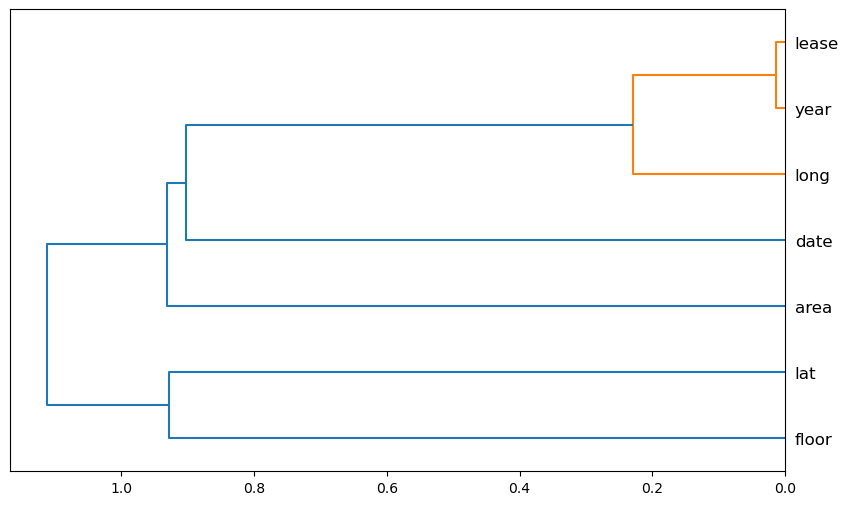

In [10]:
import scipy
from scipy.cluster import hierarchy as hc
import matplotlib.pyplot as plt

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()
cluster_columns(xs)

In [4]:
def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

15590.498502237007 vs 19921.728257665978


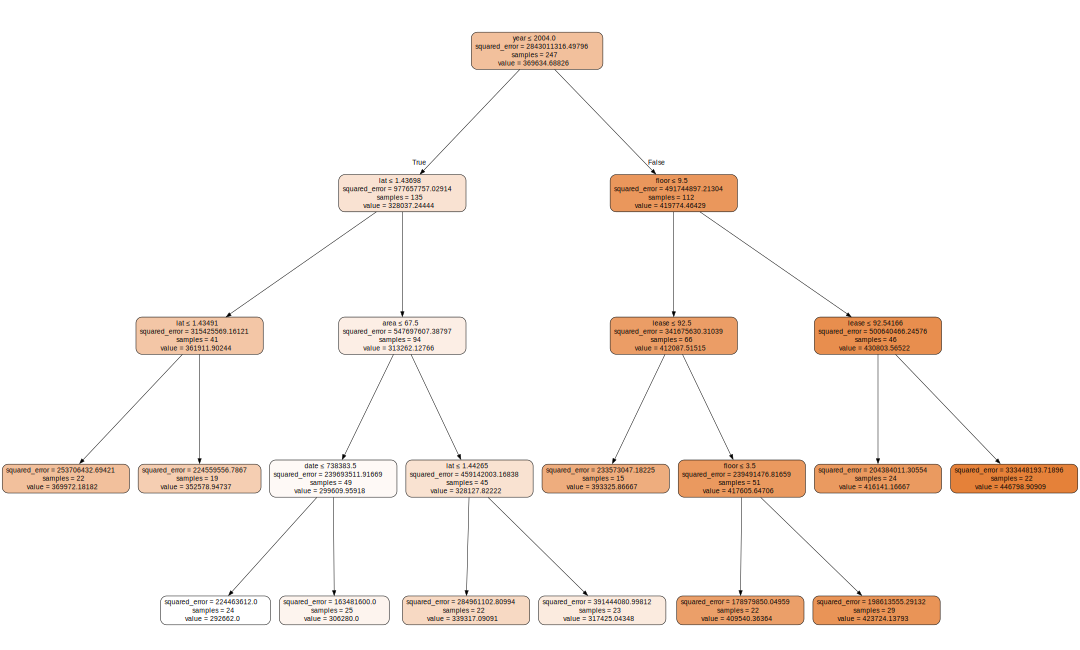

In [5]:
#m = DecisionTreeRegressor(min_samples_leaf=20).fit(xs,y)
m = DecisionTreeRegressor(min_samples_split=30).fit(trn_xs,trn_y)
trn_err = mean_squared_error(trn_y, m.predict(trn_xs),squared=False)
single_mse = mean_squared_error(val_y, m.predict(val_xs),squared=False)
print(f"{trn_err} vs {single_mse}")
draw_tree(m,xs,size=15,precision=5)

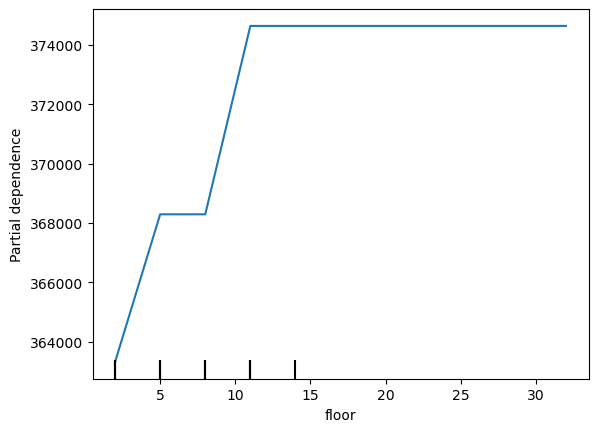

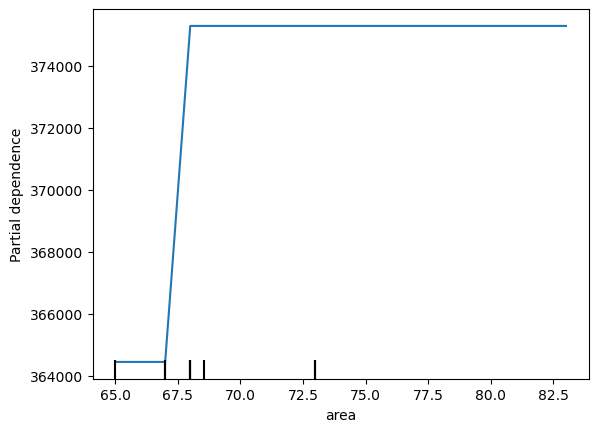

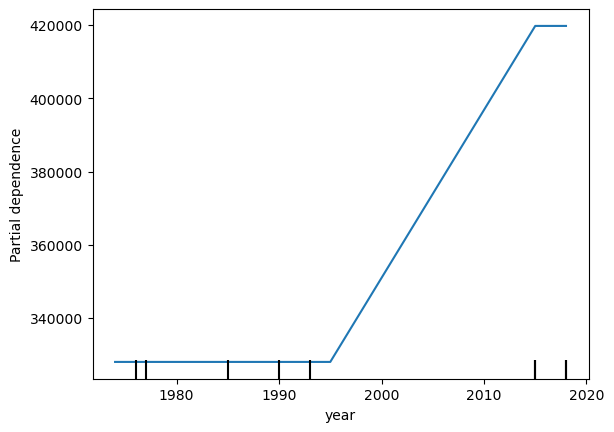

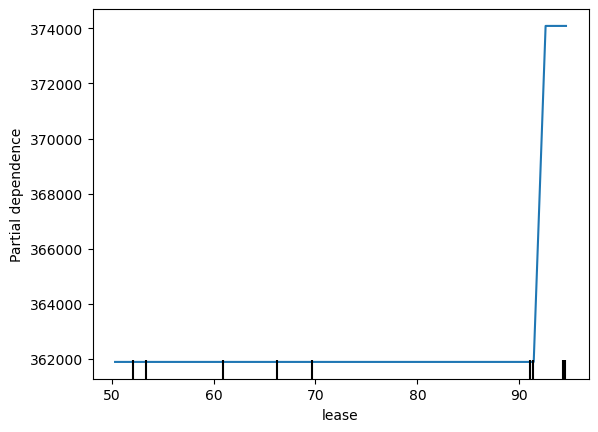

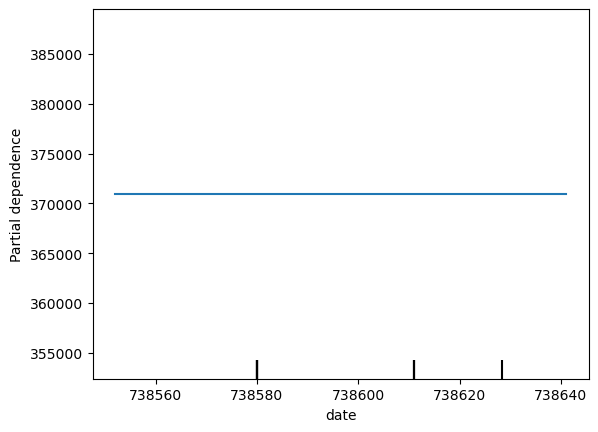

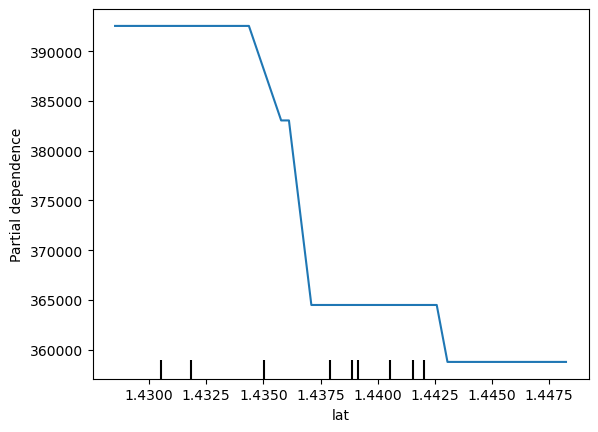

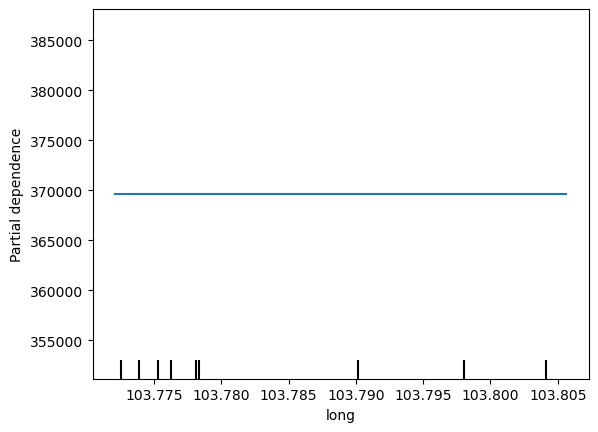

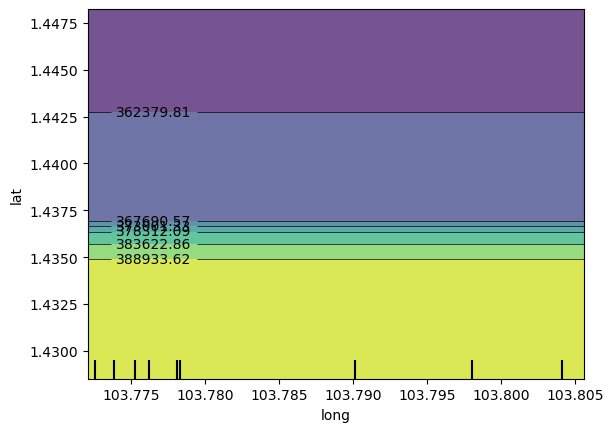

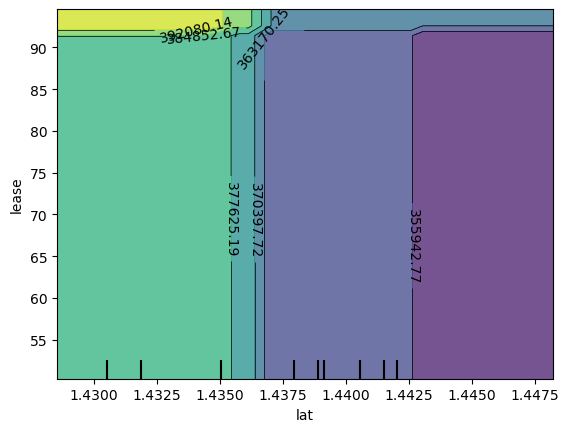

In [7]:
#feat = 'area'
#pd_res = partial_dependence(m,val_xs,[feat])
#display = PartialDependenceDisplay([pd_res],features=[(0,)],feature_names=["f"],target_idx=0,deciles=np.linspace(val_xs[feat].min(), val_xs[feat].max(), num=5))
#val_xs.long.min()
#display.plot()
PartialDependenceDisplay.from_estimator(m,val_xs,[(0,)])
PartialDependenceDisplay.from_estimator(m,val_xs,[(1,)])
PartialDependenceDisplay.from_estimator(m,val_xs,[(2,)])
PartialDependenceDisplay.from_estimator(m,val_xs,[(3,)])
PartialDependenceDisplay.from_estimator(m,val_xs,[(4,)])
PartialDependenceDisplay.from_estimator(m,val_xs,[(5,)])
PartialDependenceDisplay.from_estimator(m,val_xs,[(6,)])
PartialDependenceDisplay.from_estimator(m,val_xs,[(6,5)])
PartialDependenceDisplay.from_estimator(m,val_xs,[(5,3)])


<Axes: ylabel='cols'>

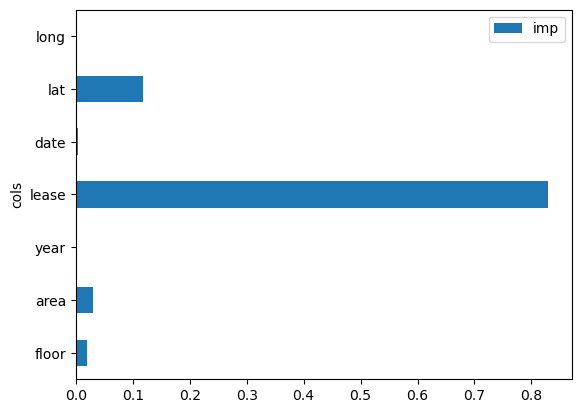

In [143]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=m.feature_importances_)).plot('cols','imp','barh')

<Axes: ylabel='cols'>

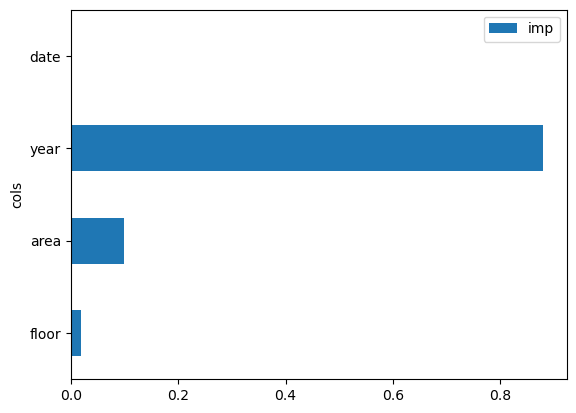

In [22]:
xs2 = trn_xs[['floor','area','year','date']]
m3 = DecisionTreeRegressor(min_samples_split=30).fit(xs2,trn_y)
pd.DataFrame(dict(cols=xs2.columns, imp=m3.feature_importances_)).plot('cols','imp','barh')
#xs2

In [221]:
m.feature_importances_
#xs.columns
# f, a, y, l, d, lat, long

array([0.01870497, 0.02970661, 0.81284336, 0.01679944, 0.00353607,
       0.11840955, 0.        ])

In [10]:
def get_tree(prop=0.75,replace=True):
  n = len(trn_y)
  idxs = np.random.choice(n, int(n*prop), replace=replace)
  return DecisionTreeRegressor(min_samples_split=30).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])


In [11]:
trees = [get_tree(0.75) for t in range(100)]
all = [t.predict(val_xs) for t in trees]
avg = np.stack(all).mean(0)

forest_mse = mean_squared_error(val_y, avg,squared=False)
print(f"validation error {single_mse} vs {forest_mse}")


validation error 19921.728257665978 vs 19468.96790364948
